In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("canada_per_capita_income.csv",index_col = 'year', parse_dates = True)
df.head()

,per capita income (US$)
year,
1970-01-01,3399.299037
1971-01-01,3768.297935
1972-01-01,4251.175484
1973-01-01,4804.463248
1974-01-01,5576.514583


In [4]:
df.isnull()

,per capita income (US$)
year,
1970-01-01,False
1971-01-01,False
1972-01-01,False
1973-01-01,False
1974-01-01,False
1975-01-01,False
1976-01-01,False
1977-01-01,False
1978-01-01,False


In [5]:
df.describe()

,per capita income (US$)
count,47.000000
mean,18920.137063
std,12034.679438
min,3399.299037
25%,9526.914515
50%,16426.725480
75%,27458.601420
max,42676.468370


Text(0, 0.5, 'Per Capita Income in US($)')

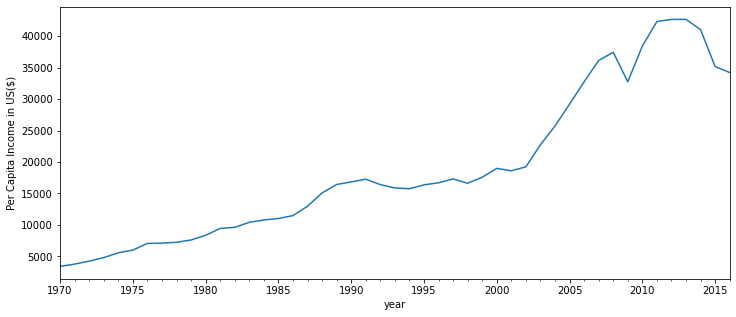

In [6]:
df['per capita income (US$)'].plot(figsize=(12,5))
plt.ylabel('Per Capita Income in US($)')

There is an increasing trend and as such the time series data is not weakly stationary. There seems to be a seasonality component in the time series especially after the year 2000. The variance also requires stabilization.

In [7]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df)
print("p-value of dataset", adf[1] )

p-value of dataset 0.9947673363937437


The non-weakly stationary nature of the dataset without differencing is significant. We can apply time series differencing to detrend the data. 

In [8]:
df1 = df.diff(periods = 1)
df1 = df1[1:]

<AxesSubplot:xlabel='year'>

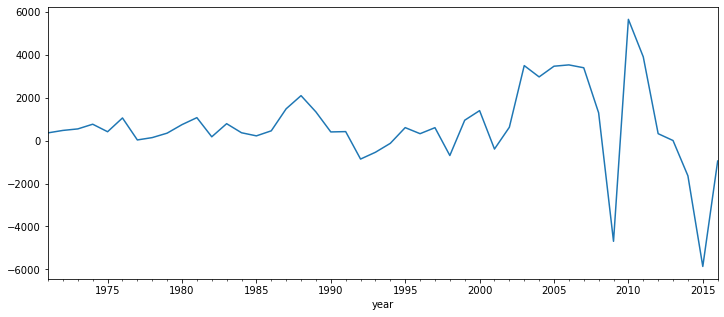

In [9]:
df1['per capita income (US$)'].plot(figsize = (12,5))

The plot above looks weakly stationary however the variance increases significantly after the year 2000

In [10]:
diff1 = adfuller(df1)
print("The p-value of the detrended time series of order 1", diff1[1])

The p-value of the detrended time series of order 1 0.010678224275029425


Against alpha = 0.05 significance level, the order one differencing of the time series plot is satisfactorily weakly stationary 

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

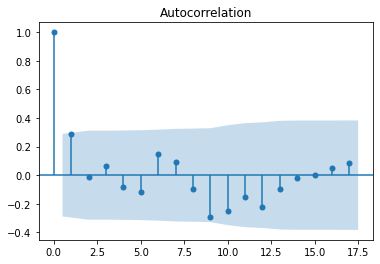

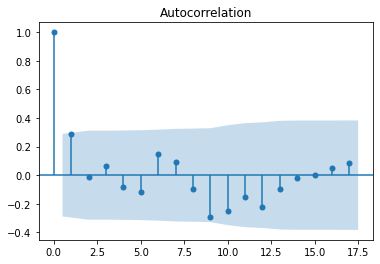

In [12]:
plot_acf(df1)

In [13]:
train = df.values[:38]
test = df.values[38:]

In [14]:
len(train)

38

In [15]:
len(test)

9

In [16]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [17]:
model_ar = AR(train)
model_fit = model_ar.fit()

C:\Users\mawul\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [18]:
predictions = model_fit.predict(start=38,end= 47 )

In [19]:
test

array([[37446.48609],
       [32755.17682],
       [38420.52289],
       [42334.71121],
       [42665.25597],
       [42676.46837],
       [41039.8936 ],
       [35175.18898],
       [34229.19363]])

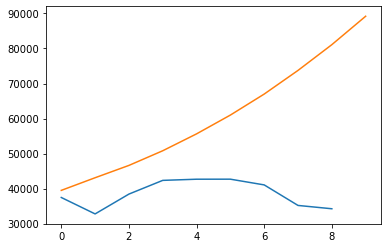

In [20]:
plt.plot(test)
plt.plot(predictions)

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [22]:
fit = auto_arima(df['per capita income (US$)'], trace = True,
                suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=832.470, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=829.124, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=827.407, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=826.951, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=832.523, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=828.630, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=829.229, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=831.106, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=828.103, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.269 seconds


In [23]:
model_arima = ARIMA(train, order = (0,1,1))

In [24]:
arima_fit = model_arima.fit()

In [25]:
pred2 = arima_fit.forecast(steps=9)[0]

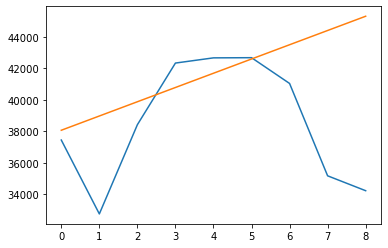

In [26]:
plt.plot(test)
plt.plot(pred2)

In [27]:
pred2

array([38068.35171836, 38973.30289393, 39878.25406949, 40783.20524505,
       41688.15642062, 42593.10759618, 43498.05877174, 44403.0099473 ,
       45307.96112287])

In [28]:
test

array([[37446.48609],
       [32755.17682],
       [38420.52289],
       [42334.71121],
       [42665.25597],
       [42676.46837],
       [41039.8936 ],
       [35175.18898],
       [34229.19363]])

In [29]:
rmse = np.sqrt(mean_squared_error(pred2,test))

In [30]:
rmse

5359.104166505529

The root mean square error is large. This may be due to the non stabilized variance. 

In [31]:
df['per capita income (US$)'] = np.log(df['per capita income (US$)'])

In [32]:
diff2 = df.diff(periods = 1)
diff2 = diff2[1:]

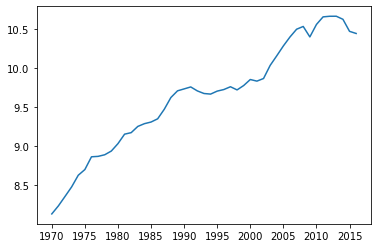

In [33]:
plt.plot(df)

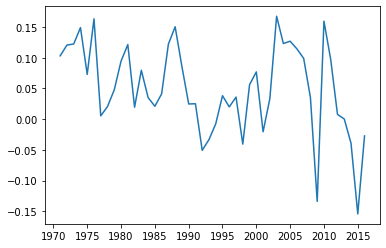

In [34]:
figsize = (12,5)
plt.plot(diff2)

In [35]:
diff2

,per capita income (US$)
year,
1971-01-01,0.103054
1972-01-01,0.120572
1973-01-01,0.122350
1974-01-01,0.149019
1975-01-01,0.072886
1976-01-01,0.163297
1977-01-01,0.005366
1978-01-01,0.020608
1979-01-01,0.047810


In [36]:
adfuller(diff2)

(-4.342626670883596,
 0.0003744776531307005,
 0,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 -83.6436801812662)

In [37]:
fit2 = auto_arima(df['per capita income (US$)'],trace = True,
                 suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-106.760, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-111.788, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-111.239, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-90.779, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-109.790, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-109.791, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-107.797, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-107.369, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.461 seconds


In [38]:
model_arima2 = ARIMA(train, order = (1,1,0))
arima2_fit = model_arima2.fit()
pred3 = arima2_fit.forecast(steps = 9)[0]

In [39]:
test

array([[10.53066816],
       [10.3968163 ],
       [10.55634705],
       [10.65336262],
       [10.66114019],
       [10.66140296],
       [10.62229989],
       [10.46809625],
       [10.44083417]])

In [40]:
rmse2 = np.sqrt(mean_squared_error(pred3, test))

In [41]:
rmse2

0.3543724260483994

No handles with labels found to put in legend.


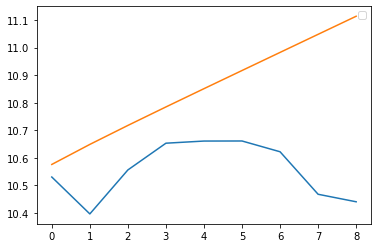

In [42]:
plt.plot(test)
plt.plot(pred3)
plt.legend()

In [45]:
import scipy.stats as st

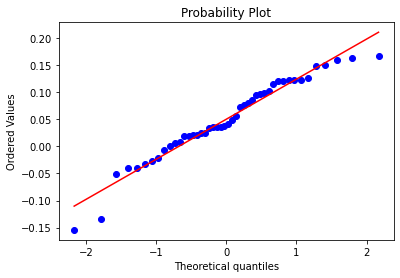

In [46]:
st.probplot(diff2['per capita income (US$)'], plot = plt);